# 7. Wpływ wielkości środowiska na stabilność roślinności

Zbadamy jak rozmiar obszaru $\Omega$ wpływa na zdolność roślinności do samoorganizacji oraz jej końcową stabilność. Zgodnie z modelem Klausmeiera, roślinność nie rozprzestrzenia się jednorodnie, lecz tworzy **skupiska (patche)**, które optymalizują gospodarkę wodną.

Do analizy wykorzystamy następujące wskaźniki statystyczne obliczane w chwili końcowej $T_{end}$:
* **Średnia biomasa ($\mu_v$)**: $\mu_v(t) = \frac{1}{|\Omega|} \int_{\Omega} v(x, t) dx$ – określa ogólną kondycję ekosystemu.
* **Maksymalna biomasa ($\zeta_v$)**: $\zeta_v(t) = \max_{x \in \Omega} v(x, t)$ – pozwala zidentyfikować intensywność uformowanych kęp.

Analiza dla a=1.5...
Analiza dla a=1.0...


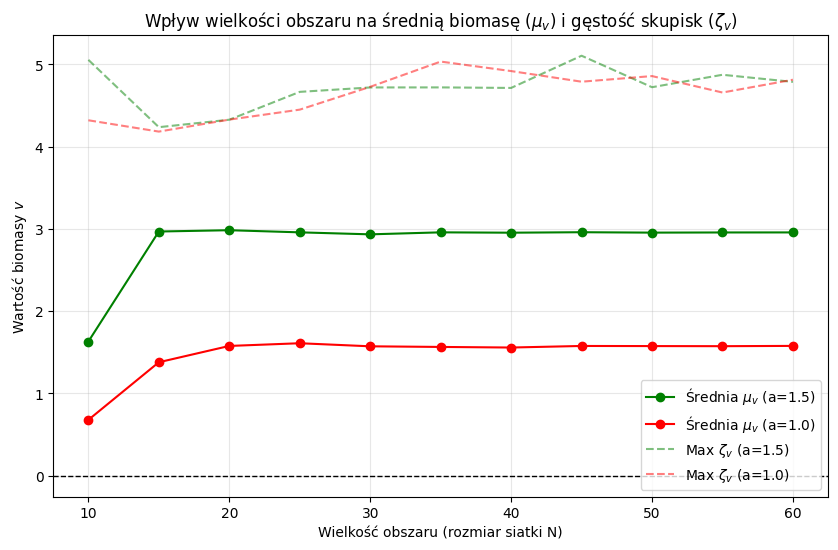

In [3]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join('..')))

from pipeline.niestabilnosc import analyze_domain_size

N_testy = np.arange(10, 61, 5) 
dt = 0.01
T_max = 100

# parametry dla dwóch scenariuszy
p_bujna = {'a': 1.5, 'm': 0.45, 'd1': 1.0, 'd2': 0.01}
p_trudna = {'a': 1.0, 'm': 0.45, 'd1': 1.0, 'd2': 0.01}

print("Analiza dla a=1.5...")
wyniki_1_mu, wyniki_1_zeta = analyze_domain_size(N_testy, dt, T_max, p_bujna)

print("Analiza dla a=1.0...")
wyniki_2_mu, wyniki_2_zeta = analyze_domain_size(N_testy, dt, T_max, p_trudna)

plt.figure(figsize=(10, 6))

plt.plot(N_testy, wyniki_1_mu, 'go-', label=r'Średnia $\mu_v$ (a=1.5)')
plt.plot(N_testy, wyniki_2_mu, 'ro-', label=r'Średnia $\mu_v$ (a=1.0)')

plt.plot(N_testy, wyniki_1_zeta, 'g--', alpha=0.5, label=r'Max $\zeta_v$ (a=1.5)')
plt.plot(N_testy, wyniki_2_zeta, 'r--', alpha=0.5, label=r'Max $\zeta_v$ (a=1.0)')

plt.axhline(0, color='black', lw=1, linestyle='--')
plt.xlabel('Wielkość obszaru (rozmiar siatki N)')
plt.ylabel('Wartość biomasy $v$')
plt.title(r'Wpływ wielkości obszaru na średnią biomasę ($\mu_v$) i gęstość skupisk ($\zeta_v$)')

plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig("../wplyw_wielkosci_srodowiska.png", dpi=300, bbox_inches='tight')
plt.show()

### Interpretacja wyników
Na wykresie zaobserwowano kluczowe zjawiska potwierdzające teorię samoorganizacji modelu Klausmeiera:

1. **Krytyczny rozmiar środowiska ($|\Omega|_{crit}$)**:

   Dla najmniejszych wartości $N$, średnia biomasa $\mu_v$ oraz maksimum $\zeta_v$ są niższe. Jest to obszar bliski najmniejszemu $|\Omega|$, dla którego istnieją niezerowe rozwiązania. Wynika to z faktu, że w zbyt małym obszarze straty zasobów na brzegach dominują nad tempem wzrostu, co uniemożliwia uformowanie w pełni stabilnego skupiska.

2. **Zbieżność do niezerowego stanu stacjonarnego**:

   Powyżej progu $N \approx 20$, średnia biomasa $\mu_v$ stabilizuje się i przyjmuje stałą wartość. Oznacza to, że system osiągnął stabilną strukturę przestrzenną, zwiększanie terenu skutkuje pojawianiem się nowych skupisk, ale średnie zagęszczenie roślinności na jednostkę powierzchni pozostaje stałe.

3. **Analiza wskaźnika maksymalnej biomasy ($\zeta_v$)**:

   Choć linia $\zeta_v$ (maksimum) wykazuje drobne wahania, jej ogólny trend pozostaje stabilny wzdłuż osi rozmiaru domeny. Zjawisko to dowodzi, że pojedyncze kępy roślinności zachowują zbliżoną gęstość i strukturę wewnętrzną niezależnie od wielkości dostępnej przestrzeni.

### Wnioski
* **Samoorganizacja**: roślinność wykazuje silną tendencję do tworzenia skupisk, co ułatwia jej konkurencję o zasoby (wodę) w trudnych warunkach środowiskowych ($a=1.0$).
* **Równowaga dynamiczna**: stabilizacja obu wskaźników ($\mu_v$ i $\zeta_v$) potwierdza, że model osiągnął stan równowagi, w którym zagęszczenie biomasy jest limitowane jedynie przez parametr opadów $a$.
* **Odporność systemu**: wyraźnie wyższa biomasa dla $a=1.5$ w porównaniu do $a=1.0$ pokazuje, że model poprawnie reaguje na dostępność zasobów, zachowując przy tym te same krytyczne cechy strukturalne (rozmiar krytyczny).